<a href="https://colab.research.google.com/github/shimchu/Quick_Draw/blob/main/larger_Final_Quick_Draw_low_val_acc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import cv2
from google.colab import files
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

--2024-07-29 12:05:04--  https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/apple.npy
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.130.207, 74.125.68.207, 64.233.170.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.130.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113462128 (108M) [application/octet-stream]
Saving to: ‘quickdraw_data/apple.npy’

apple.npy           100%[===================>] 108.21M  21.7MB/s    in 6.0s    

2024-07-29 12:05:11 (18.0 MB/s) - ‘quickdraw_data/apple.npy’ saved [113462128/113462128]

--2024-07-29 12:05:11--  https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/airplane.npy
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.130.207, 74.125.68.207, 64.233.170.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.130.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118872512 (11

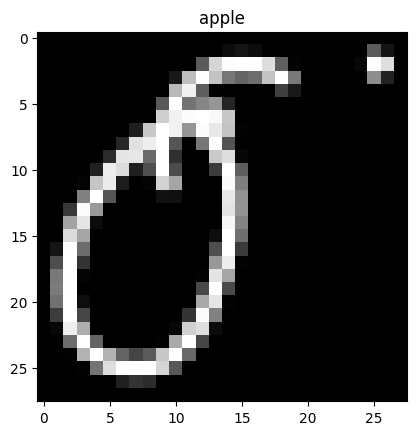

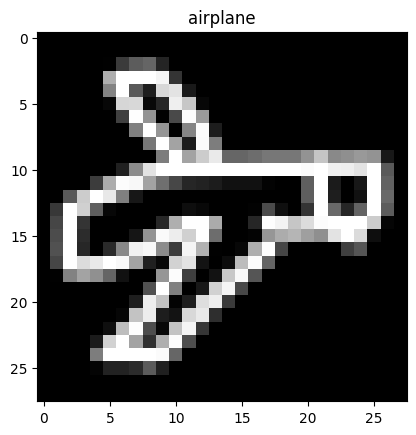

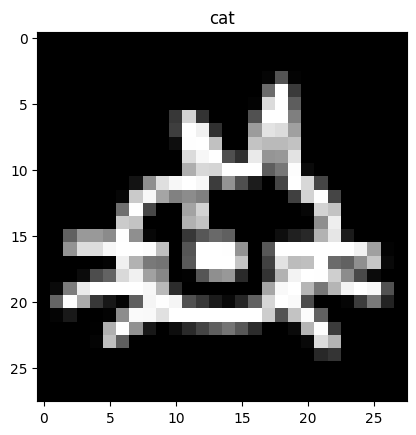

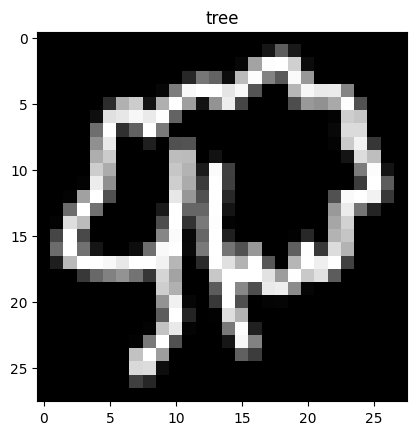

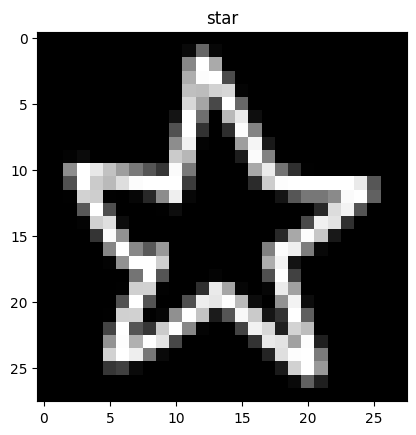

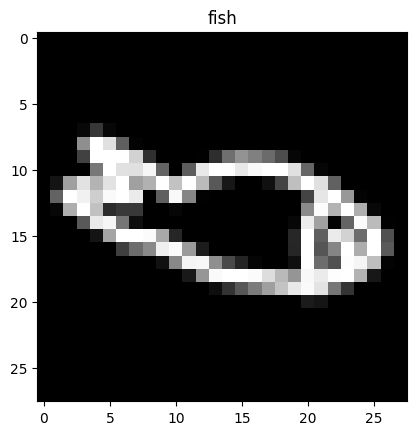

In [ ]:
# Create a directory to store the dataset
os.makedirs('quickdraw_data', exist_ok=True)

# Download the dataset using wget
!wget -P quickdraw_data https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/apple.npy
!wget -P quickdraw_data https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/airplane.npy
!wget -P quickdraw_data https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/cat.npy
!wget -P quickdraw_data https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/tree.npy
!wget -P quickdraw_data https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/star.npy
!wget -P quickdraw_data https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/fish.npy

# Load the dataset
apple = np.load('quickdraw_data/apple.npy')
airplane = np.load('quickdraw_data/airplane.npy')
cat = np.load('quickdraw_data/cat.npy')
tree = np.load('quickdraw_data/tree.npy')
star = np.load('quickdraw_data/star.npy')
fish = np.load('quickdraw_data/fish.npy')

# Print the shape of the dataset
print('Apple:', apple.shape)
print('Airplane:', airplane.shape)
print('Cat:', cat.shape)
print('Tree:', tree.shape)
print('Star:', star.shape)
print('Fish:', fish.shape)

datasets = [apple, airplane, cat, tree, star, fish]
class_names = ['apple', 'airplane', 'cat', 'tree', 'star', 'fish']

for class_name, dataset in zip(class_names, datasets):
    plt.imshow(dataset[0].reshape(28, 28), cmap='gray')
    plt.title(class_name)
    plt.show()





Epoch 1/20
1500/1500 [==============================] - 9s 5ms/step - loss: 0.3653 - accuracy: 0.8770 - val_loss: 0.2523 - val_accuracy: 0.9188
Epoch 2/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2171 - accuracy: 0.9282 - val_loss: 0.2025 - val_accuracy: 0.9337
Epoch 3/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1693 - accuracy: 0.9428 - val_loss: 0.1978 - val_accuracy: 0.9358
Epoch 4/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1372 - accuracy: 0.9537 - val_loss: 0.1725 - val_accuracy: 0.9456
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1121 - accuracy: 0.9623 - val_loss: 0.1833 - val_accuracy: 0.9438
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0892 - accuracy: 0.9701 - val_loss: 0.1904 - val_accuracy: 0.9427
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0706 - accuracy: 0.9756 - val_loss: 0.1964 - val_accuracy:

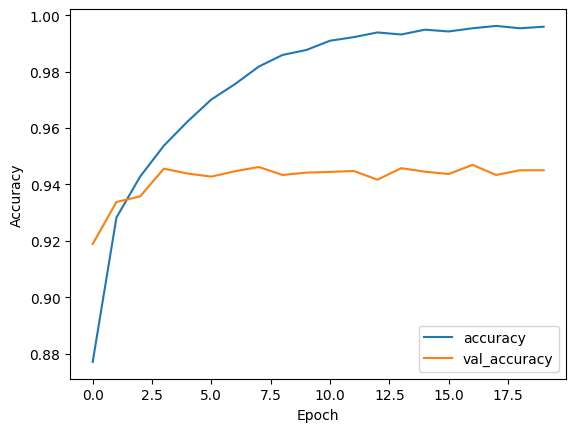

1/1 [==============================] - 0s 66ms/step


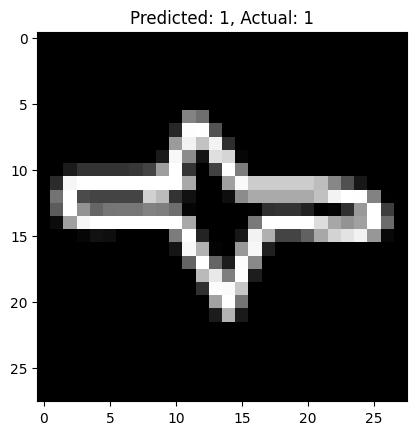

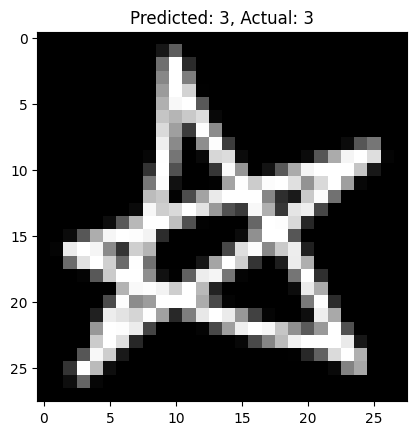

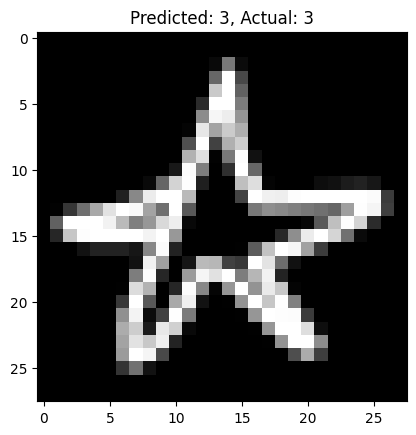

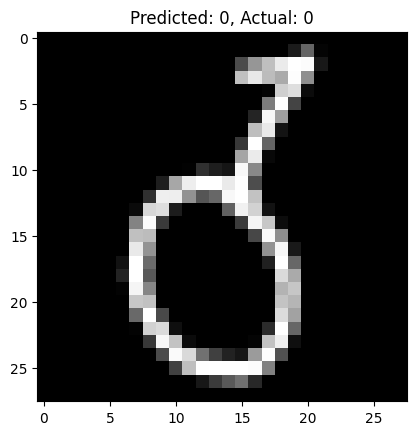

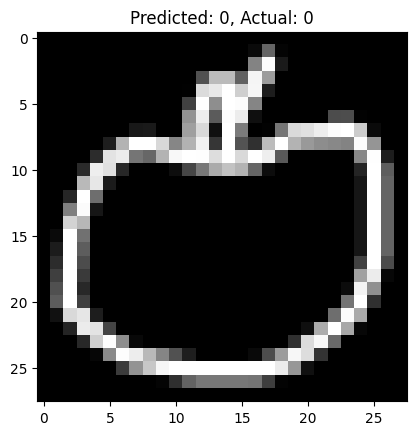

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

# Load the data
import numpy as np

# Load the datasets for each class
apple = np.load('quickdraw_data/apple.npy')
airplane = np.load('quickdraw_data/airplane.npy')
cat = np.load('quickdraw_data/cat.npy')
star = np.load('quickdraw_data/star.npy')
fish = np.load('quickdraw_data/fish.npy')
tree = np.load('quickdraw_data/tree.npy')

# Reduce the dataset size by taking a smaller subset
apple = apple[:10000]
airplane = airplane[:10000]
cat = cat[:10000]
star = star[:10000]
fish = fish[:10000]
tree = tree[:10000]

# Create labels
apple_labels = np.zeros(len(apple))
airplane_labels = np.ones(len(airplane))
cat_labels = np.full(len(cat), 2)
star_labels = np.full(len(star), 3)
fish_labels = np.full(len(fish), 4)
tree_labels = np.full(len(tree), 5)

# Combine data and labels
data = np.concatenate([apple, airplane, cat, star, fish, tree], axis=0)
labels = np.concatenate([apple_labels, airplane_labels, cat_labels, star_labels, fish_labels, tree_labels], axis=0)

# Normalize data
data = data / 255.0

# Reshape data
data = data.reshape(data.shape[0], 28, 28, 1)

# Convert labels to categorical
labels = to_categorical(labels, num_classes=6)

# Split data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

# Build the model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(6, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))

# Evaluate the model
val_loss, val_acc = model.evaluate(x_val, y_val)
print(f'Validation Accuracy: {val_acc:.4f}')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Display some predictions
predictions = model.predict(x_val[:5])
for i in range(5):
    plt.imshow(x_val[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {np.argmax(predictions[i])}, Actual: {np.argmax(y_val[i])}')
    plt.show()


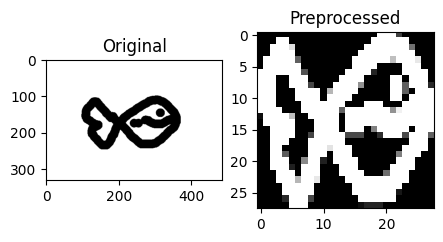

1/1 [==============================] - 0s 111ms/step


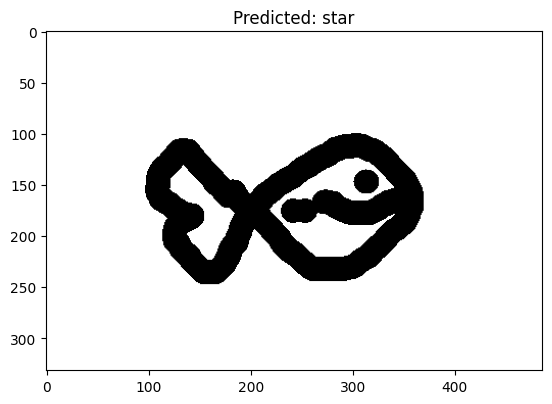

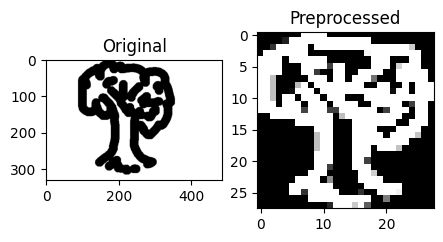

1/1 [==============================] - 0s 18ms/step


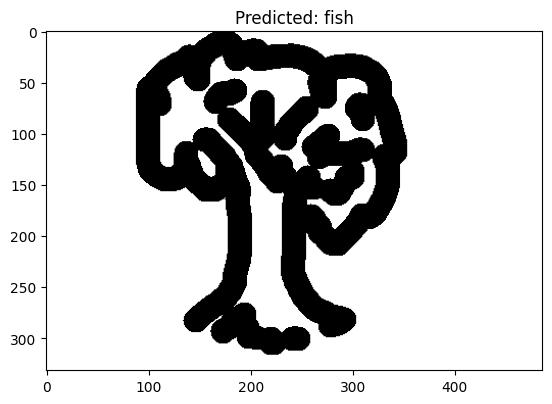

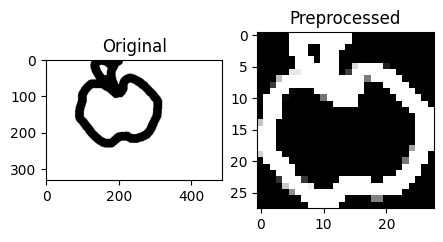

1/1 [==============================] - 0s 26ms/step


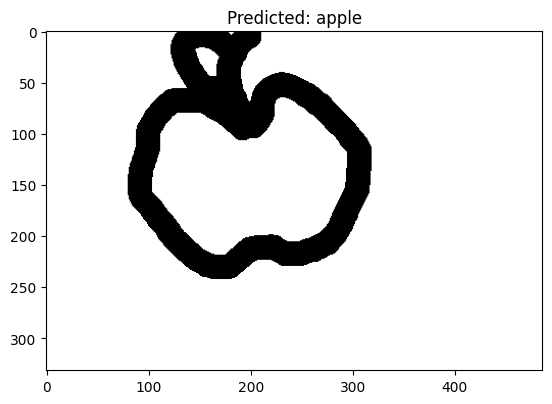

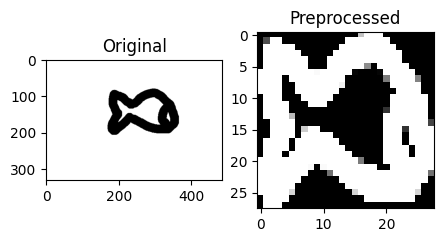

1/1 [==============================] - 0s 25ms/step


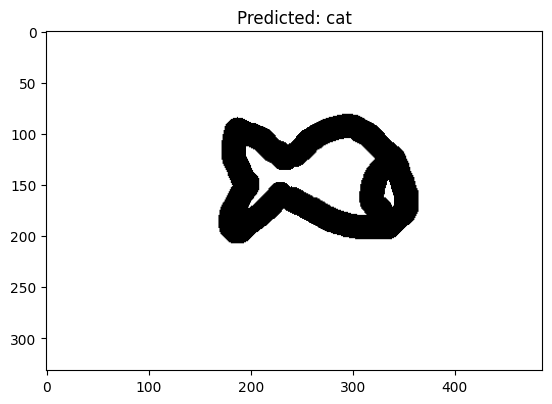

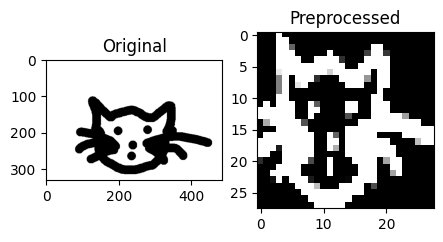

1/1 [==============================] - 0s 26ms/step


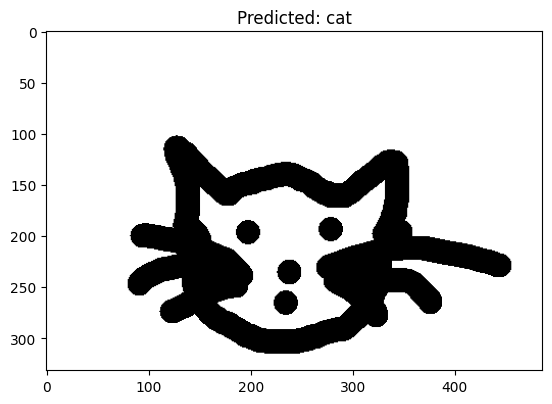

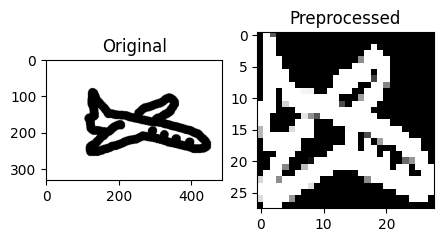

1/1 [==============================] - 0s 25ms/step


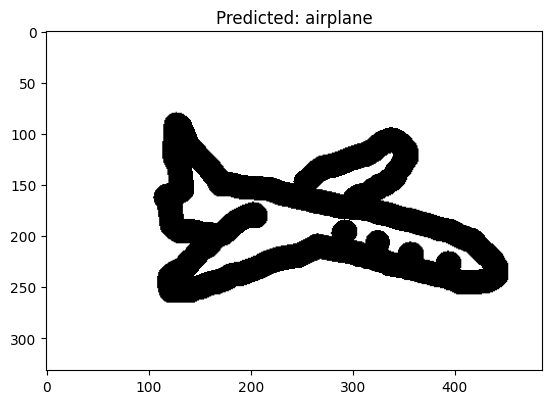

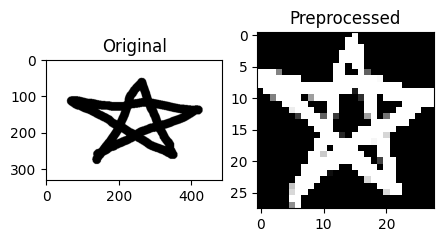

1/1 [==============================] - 0s 17ms/step


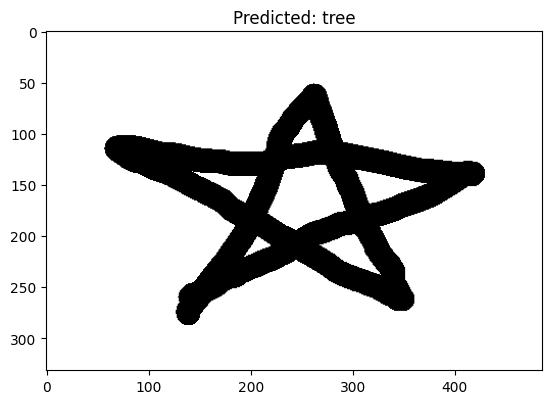

In [ ]:
import cv2
import numpy as np

import matplotlib.pyplot as plt


# Function to preprocess the image
def preprocess_image(image_path):
    # Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image not found or unable to load: {image_path}")

    # Find the bounding box of the non-zero pixels (the drawing)
    coords = cv2.findNonZero(cv2.bitwise_not(img))
    x, y, w, h = cv2.boundingRect(coords)

    # Crop the bounding box out of the image
    img_cropped = img[y:y+h, x:x+w]

    # Resize the cropped image to 28x28
    img_resized = cv2.resize(img_cropped, (28, 28))

    # Invert the colors if necessary
    img_inverted = cv2.bitwise_not(img_resized)

    # Normalize the image
    img_normalized = img_inverted / 255.0

    # Reshape the image to match the input shape of the model
    img_final = img_normalized.reshape(1, 28, 28, 1)

    return img_final

# Function to visualize the preprocessed image
def visualize_preprocessed_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image not found or unable to load: {image_path}")

    # Find the bounding box of the non-zero pixels (the drawing)
    coords = cv2.findNonZero(cv2.bitwise_not(img))
    x, y, w, h = cv2.boundingRect(coords)

    # Crop the bounding box out of the image
    img_cropped = img[y:y+h, x:x+w]

    # Resize the cropped image to 28x28
    img_resized = cv2.resize(img_cropped, (28, 28))

    # Invert the colors if necessary
    img_inverted = cv2.bitwise_not(img_resized)

    # Normalize the image
    img_normalized = img_inverted / 255.0

    plt.figure(figsize=(5, 5))
    plt.subplot(1, 2, 1)
    plt.title('Original')
    plt.imshow(img, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title('Preprocessed')
    plt.imshow(img_normalized, cmap='gray')
    plt.show()

def predict(image):
  prediction = model.predict(image)
  predicted_class = np.argmax(prediction)

  return predicted_class



folder_path = '/content/Test data'

# List all files in the folder
image_paths = [os.path.join(folder_path, file_name) for file_name in os.listdir(folder_path)]

# Load and preprocess images
for image_path in image_paths:
    try:
        visualize_preprocessed_image(image_path)
        processed_image = preprocess_image(image_path)
        predicted_class = predict(processed_image)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        plt.imshow(img, cmap='gray')
        plt.title(f'Predicted: {class_names[predicted_class]}')
        plt.show()

    except ValueError as e:
        print(e)

Saving Untitled.png to Untitled.png
1/1 [==============================] - 0s 19ms/step


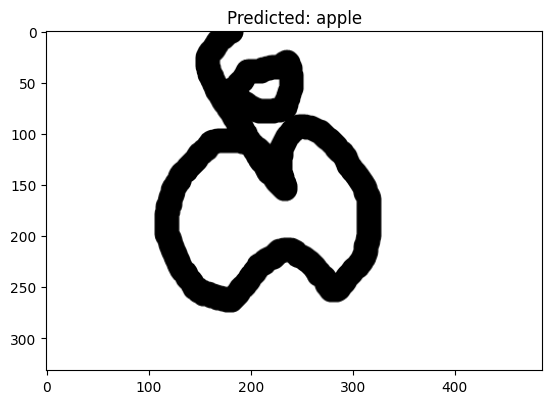

In [ ]:
# Upload your image file
def predict_on():
  uploaded = files.upload()

  # Get the file name of the uploaded image
  image_path = list(uploaded.keys())[0]

  # Preprocess the image
  processed_image = preprocess_image(image_path)

  # Make a prediction
  prediction = model.predict(processed_image)
  predicted_class = np.argmax(prediction)

  # Display the result
  plt.imshow(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), cmap='gray')
  plt.title(f'Predicted: {class_names[predicted_class]}')
  plt.show()

In [ ]:
predict_on()